In [6]:
your_local_path='C:/Users/Thinkpad/Desktop/ML/Logistic Regression/'

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',5000)
import pandas as pd
credit_def=pd.read_csv(your_local_path+'default.csv')
credit_def.sample(10)

,default,student,balance,income
3098,No,No,838.437038,40903.48069
1705,No,Yes,847.056485,13741.32707
8005,No,No,1667.480365,47991.58505
5223,No,No,789.256511,43835.34027
4705,No,No,1268.593973,42012.89659
9629,No,No,0.000000,40737.86681
2935,No,Yes,1391.508027,18539.59036
5289,No,Yes,1639.426608,14682.77666
3114,No,No,578.752566,60498.92546
8869,No,No,1433.992327,19864.97538


In [177]:
credit_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [178]:
credit_def.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


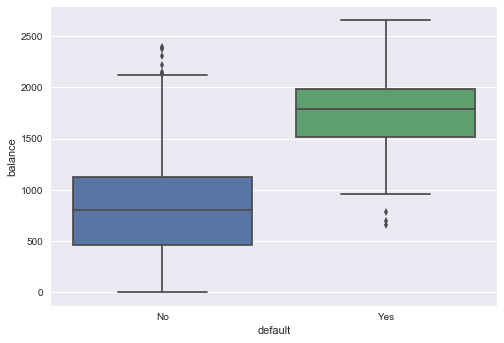

In [10]:
sns.boxplot(y='balance',x='default',data=credit_def)
plt.show()

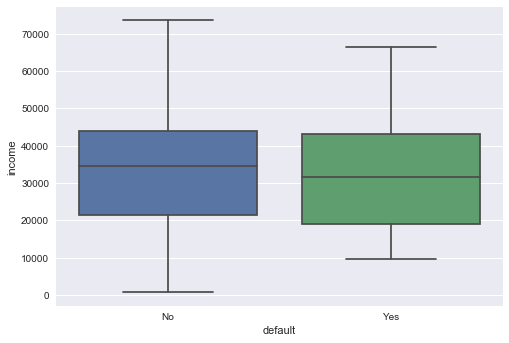

In [11]:
sns.boxplot(x='default',y='income',data=credit_def)
plt.show()

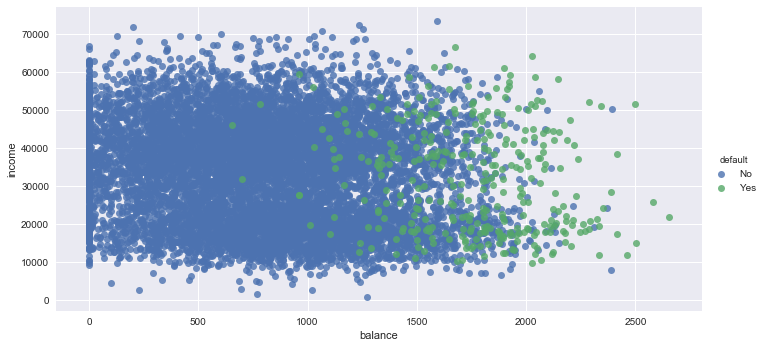

In [12]:
sns.lmplot(x='balance', y='income', hue = 'default', data=credit_def, aspect=2, fit_reg = False,ci=None)
plt.show()

In [179]:
# Create default dummy variable
def_dummies=pd.get_dummies(credit_def.default,prefix='default')
def_dummies.sample(5)

,default_No,default_Yes
3346,1,0
5717,1,0
3128,1,0
6696,1,0
9557,1,0


In [180]:
def_dummies.drop(def_dummies.columns[0],axis=1,inplace=True)
def_dummies.sample(5)

,default_Yes
8342,1
1934,0
6397,0
929,0
2651,0


In [181]:
credit_def=pd.concat([credit_def,def_dummies],axis=1)
credit_def.sample(5)

,default,student,balance,income,default_Yes
1484,Yes,No,1790.674983,44607.42902,1
4146,No,Yes,1355.313216,11070.85497,0
6017,No,No,0.000000,30524.75601,0
6810,No,Yes,1749.549609,20078.36188,0
3435,No,No,619.615505,45463.30090,0


In [16]:
pd.crosstab(credit_def['default'],credit_def['student'],rownames=['Default'],colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


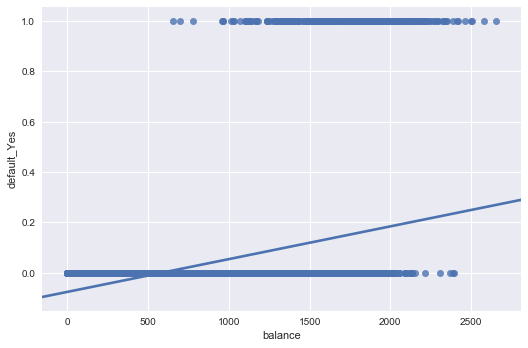

In [17]:
# Try simple linear regression on the data
sns.lmplot(x='balance', y='default_Yes', data=credit_def, aspect=1.5, ci = None, fit_reg = True)
plt.show()

In [ ]:
# Build logistic regression model
from sklearn.linear_model import LogisticRegression
X=credit_def[['balance']]
y=credit_def['default_Yes']
logreg=LogisticRegression(C=1e42)
lg=logreg.fit(X,y)
print(logreg.coef_)
print(logreg.intercept_)

In [188]:
#splitting the independent and dependent attributes
#student_dummies = pd.get_dummies(credit_def.student,prefix='student')
#student_dummies.sample(5)
#credit_def.sample(5)
#credit_def=pd.concat([credit_def,student_dummies],axis=1)
#credit_def.sample(5)
#X = credit_def.drop('default',1)
y = credit_def['default_Yes']
X= credit_def[['balance','income','student_No','student_Yes']]
credit_def.sample(5)
print(X)
print(y)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    0
9976    0
9977    0
9978    1
9979    0
9980    0
9981    0
9982    0
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    0
9992    0
9993    0
9994    0
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default_Yes, dtype: uint8


In [256]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression(C=0.1)

In [258]:
# Using training dataset train the machine
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [264]:
# Now using test data, predict the value of y, ie default or not
y_pred_test=logreg.predict_proba(X_test)
#print(y_pred_test)
#print(y_test)
def get_probability(y_test):
    y_pred=pd.DataFrame({'original':y_test,'probability':y_pred_test[:,1]})
    return y_pred
y_pred=get_probability(y_test)

#y_pred_train=logreg.predict(X_train)
#Check for accuracy now by comparing predicted and actual test values
#print(metrics.accuracy_score(y_pred_test,y_test))

In [282]:
y_pred

,original,probability,predicted
4182,0,0.011720,0
1824,0,0.004310,0
9276,0,0.217084,0
6740,0,0.004890,0
5354,1,0.023859,0
4046,0,0.001193,0
5535,0,0.051902,0
8405,0,0.013173,0
9636,0,0.002636,0
110,0,0.002926,0


In [370]:
def threshold(cutoff):
   y_pred['predicted']=y_pred.probability.map(lambda x:1 if x > cutoff else 0) 
   return metrics.accuracy_score(y_pred.original,y_pred.predicted)
print(threshold(0.1))
print(threshold(0.2))
print(threshold(0.3))
print(threshold(0.4))
print(threshold(0.5))
print(threshold(0.6))

0.769333333333
0.909333333333
0.958
0.964666666667
0.968
0.968
